

# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> ## This is TMDb movie data. 
### Overview and Notes
This data set contains information about 10,000 movies collected from <br/>
The Movie Database (TMDb), including user ratings and revenue. <br/>
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. <br/>
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. <br/>
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, 
accounting for inflation over time. <br/>
### Example Questions
Which genres are most popular from year to year? 
What kinds of properties are associated with movies that have high revenues?




<a id='wrangling'></a>
## Analysis TMDB 5000 Movie Dataset
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## get Knowledge about data set

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling

<a id='wrangling'></a>
### Drop Duplicates

In [5]:
def drop_duplicated_rows(df,id):
    dup_qty=df.duplicated().sum()
    if dup_qty>0:
        df.drop_duplicates(keep='first',subset=df.columns.drop(id),inplace=True)
        print("{} row deleted".format(dup_qty).title())
    else:
         print('no duplicat rows'.title())
    return df

In [6]:
def change_columns_types(df,columns,types):
    for i,c in enumerate(columns):
        df[c]=df[c].astype(types[i])
        if(types[i]=='datetime'):
            df[c] = pd.to_datetime(df[c])
    return df

In [7]:
types=['float']*7
types.append('datetime')
df=change_columns_types(df,['popularity','revenue','vote_count','vote_average','budget_adj','revenue_adj'],types)

In [8]:
df=drop_duplicated_rows(df,'id')
df.shape

1 Row Deleted


(10865, 21)

<a id='wrangling'></a>

### Replacing the columns names to lowercase and to be one word

In [9]:
def columns_names_handling(df):
    df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
    print('all columns names  converted to be lowercase and to be one word'.title())
    return df

In [10]:
df=columns_names_handling(df)

All Columns Names  Converted To Be Lowercase And To Be One Word


<a id='wrangling'></a>

### Check None Values

In [11]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# drop nan values from columns which are used for analysis
df=df.query('revenue_adj!=0 and revenue!=0 and popularity!=0 and vote_average!=0')

In [13]:
df.shape

(4849, 21)

In [14]:
df.isna().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       5
homepage                3184
director                   1
tagline                  464
keywords                 235
overview                   0
runtime                    0
genres                     0
production_companies      96
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [15]:
def split_columns(df,col,id):
    new_df=df.query('id==-1')
    df=df.query(col+'=='+col)
    col_no=df.columns.get_loc(col)
    id_no=df.columns.get_loc(id)
    for i,v in enumerate(df.values):
        splited_values=str(v[col_no]).strip().lower().split('|')
        if(len(splited_values)>1):
#             new_df=new_df[new_df.index!=i]
            for s in splited_values:
                ni=v
                ni[col_no]=s
                new_df=new_df.append(pd.DataFrame(ni.reshape(1,-1), columns=list(df)), ignore_index=True)
        else:
            ni=v
            new_df=new_df.append(pd.DataFrame(ni.reshape(1,-1), columns=list(df)), ignore_index=True)
    types=['float']*8
    types.append('datetime')
    new_df=change_columns_types(new_df,['id','popularity','vote_average','revenue','revenue_adj','budget_adj','revenue_adj'],types)
    return new_df

In [16]:
def factors_result_mean(splited_df, factors, result):
    count_series=splited_df.groupby(factors)[result].mean()
    fac_res_avg_df = count_series.to_frame(name = result).reset_index()
    return fac_res_avg_df

In [17]:
def combined_df(dfs,col,how):
    df_combined = dfs[0].merge(dfs[1], left_on=col, right_on=col, how='inner')
    for i in range(2,len(dfs),1):
        df_combined = df_combined.merge(dfs[i], left_on=col, right_on=col, how='inner')
    return df_combined

In [18]:
def drow_bar(df,x,y,w,h,f,t): 
    df=df.sort_values(by=y,ascending=False)
    df=df.iloc[f:t]
    plt.figure(figsize=(w, h))
    plt.bar(df[x],df[y])
    plt.title(y.replace('_',' ') +' Impacts on '+y)
    plt.xlabel(x.replace('_',' '))
    plt.ylabel(y.replace('_',' '))
    plt.show()
    return df

<a id='eda'></a>
### Exploratory Data Analysis for production companies

In [19]:
production_companies_df=split_columns(df,'production_companies','id')

In [20]:
production_companies_revenue_adj_df=factors_result_mean(production_companies_df,'production_companies','revenue_adj')
production_companies_revenue_df=factors_result_mean(production_companies_df,'production_companies','revenue')
production_companies_vote_avg_df=factors_result_mean(production_companies_df,'production_companies','vote_average')
production_companies_popularity_df=factors_result_mean(production_companies_df,'production_companies','popularity')

In [21]:
df_combined=combined_df([production_companies_revenue_adj_df,production_companies_revenue_df,production_companies_vote_avg_df,production_companies_popularity_df],'production_companies','inner')
df_combined

,production_companies,revenue_adj,revenue,vote_average,popularity
0,"""dia"" productions gmbh & co. kg",5.257149e+07,4.435093e+07,5.700000,1.626534
1,1019 entertainment,2.577386e+06,2.801508e+06,5.700000,0.336107
2,10th hole productions,1.194264e+07,1.196538e+07,6.233333,0.434259
3,11:11 mediaworks,1.289223e+08,1.191883e+08,5.200000,0.727752
4,120db films,4.997941e+05,5.339245e+05,6.400000,0.375512
...,...,...,...,...,...
4160,zucker/netter productions,3.142795e+08,3.092083e+08,7.100000,2.367474
4161,zupnik cinema group ii,1.666726e+07,1.072523e+07,7.200000,0.980566
4162,zupnik-curtis enterprises,2.549322e+07,1.214517e+07,5.800000,0.495575
4163,zweites deutsches fernsehen (zdf),8.387973e+07,4.591241e+07,7.100000,0.692243


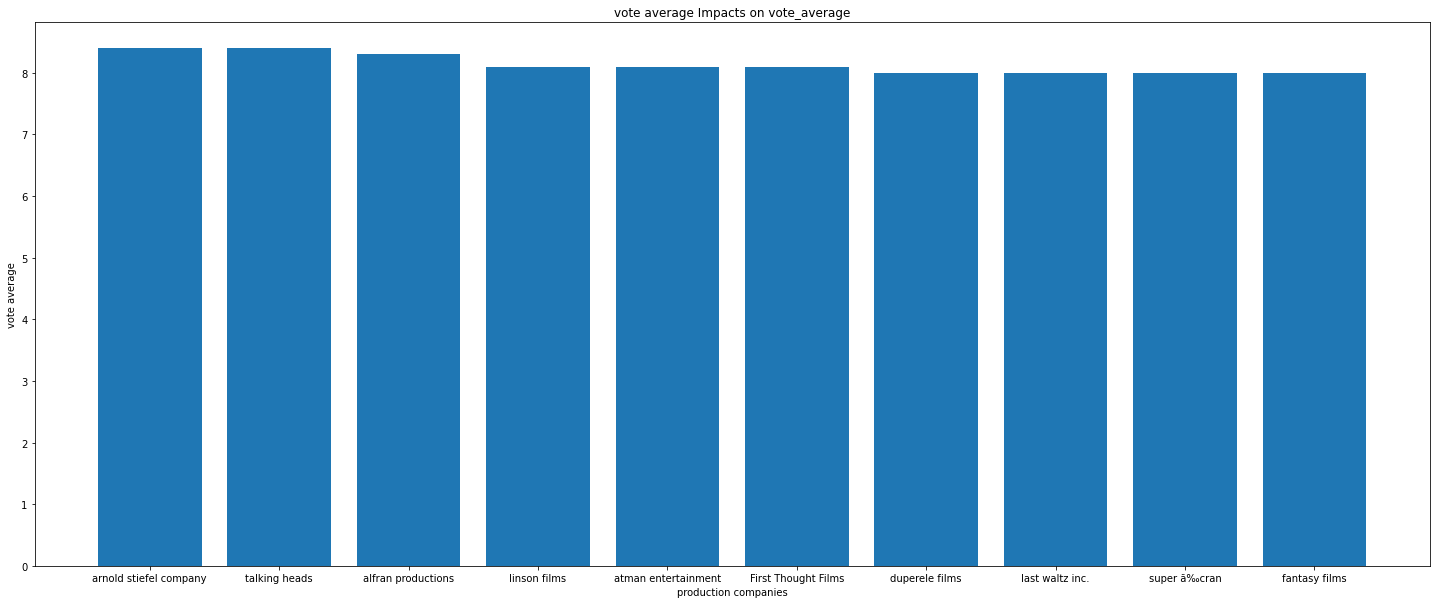

,production_companies,vote_average
666,arnold stiefel company,8.4
3641,talking heads,8.4
543,alfran productions,8.3
2379,linson films,8.1
706,atman entertainment,8.1
198,First Thought Films,8.1
1423,duperele films,8.0
2308,last waltz inc.,8.0
3614,super ã‰cran,8.0
1566,fantasy films,8.0


In [22]:
production_companies_vote_avg_df=drow_bar(production_companies_vote_avg_df,'production_companies','vote_average',25,10,0,10)
production_companies_vote_avg_df

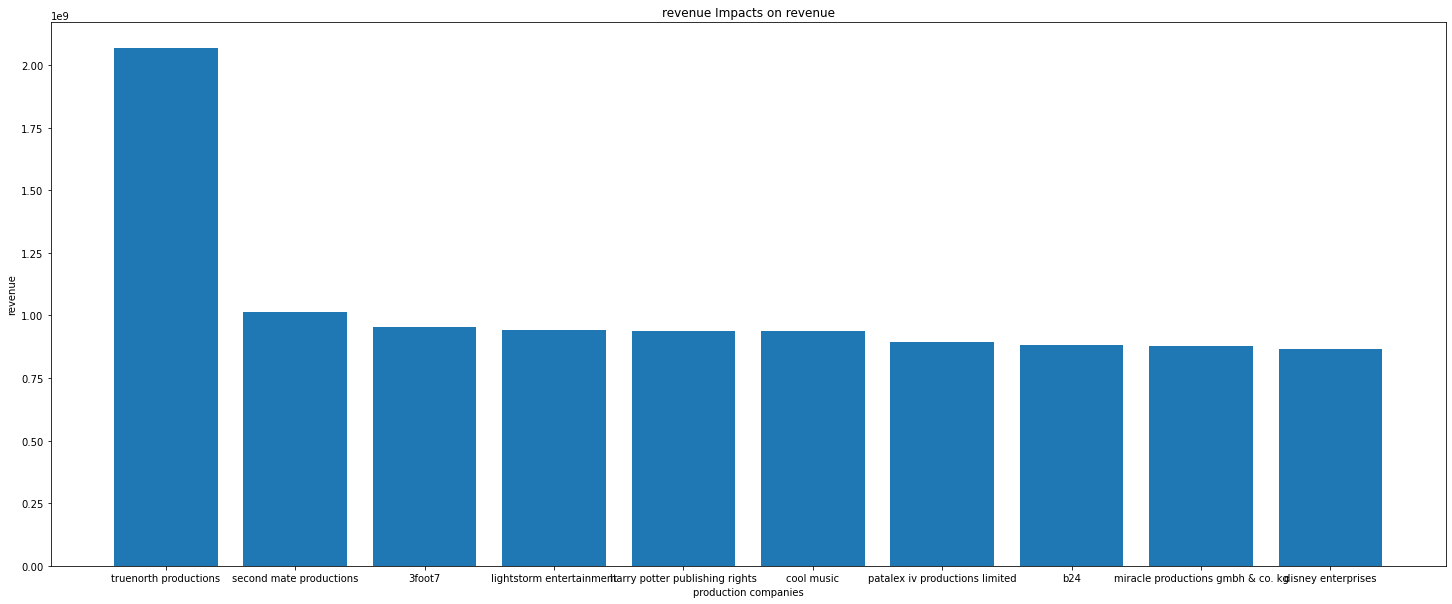

,production_companies,revenue
3859,truenorth productions,2.068178e+09
3363,second mate productions,1.013330e+09
36,3foot7,9.551198e+08
2368,lightstorm entertainment,9.409042e+08
1906,harry potter publishing rights,9.382127e+08
1193,cool music,9.382127e+08
2961,patalex iv productions limited,8.959210e+08
737,b24,8.806746e+08
2633,miracle productions gmbh & co. kg,8.766885e+08
1369,disney enterprises,8.646260e+08


In [23]:
production_companies_revenue_df=drow_bar(production_companies_revenue_df,'production_companies','revenue',25,10,0,10)
production_companies_revenue_df

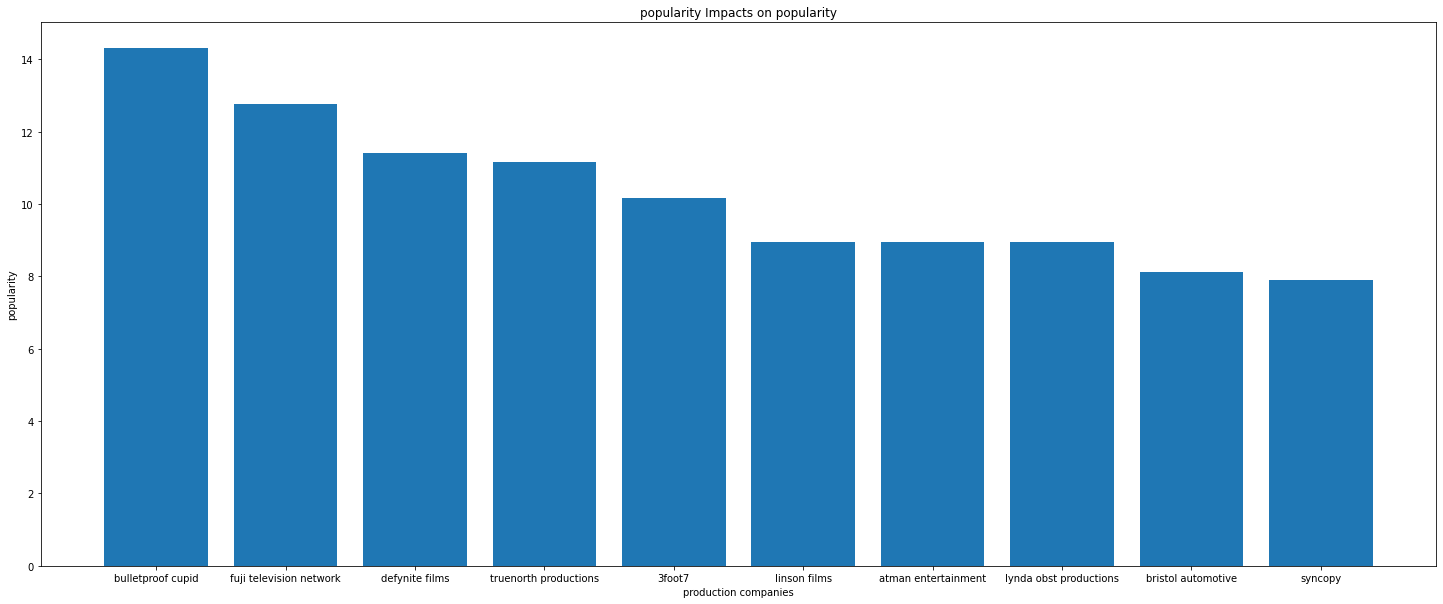

,production_companies,popularity
945,bulletproof cupid,14.311205
1746,fuji television network,12.777401
1321,defynite films,11.422751
3859,truenorth productions,11.173104
36,3foot7,10.174599
2379,linson films,8.947905
706,atman entertainment,8.947905
2440,lynda obst productions,8.941365
914,bristol automotive,8.110711
3631,syncopy,7.903816


In [24]:
production_companies_popularity_df=drow_bar(production_companies_popularity_df,'production_companies','popularity',25,10,0,10)
production_companies_popularity_df

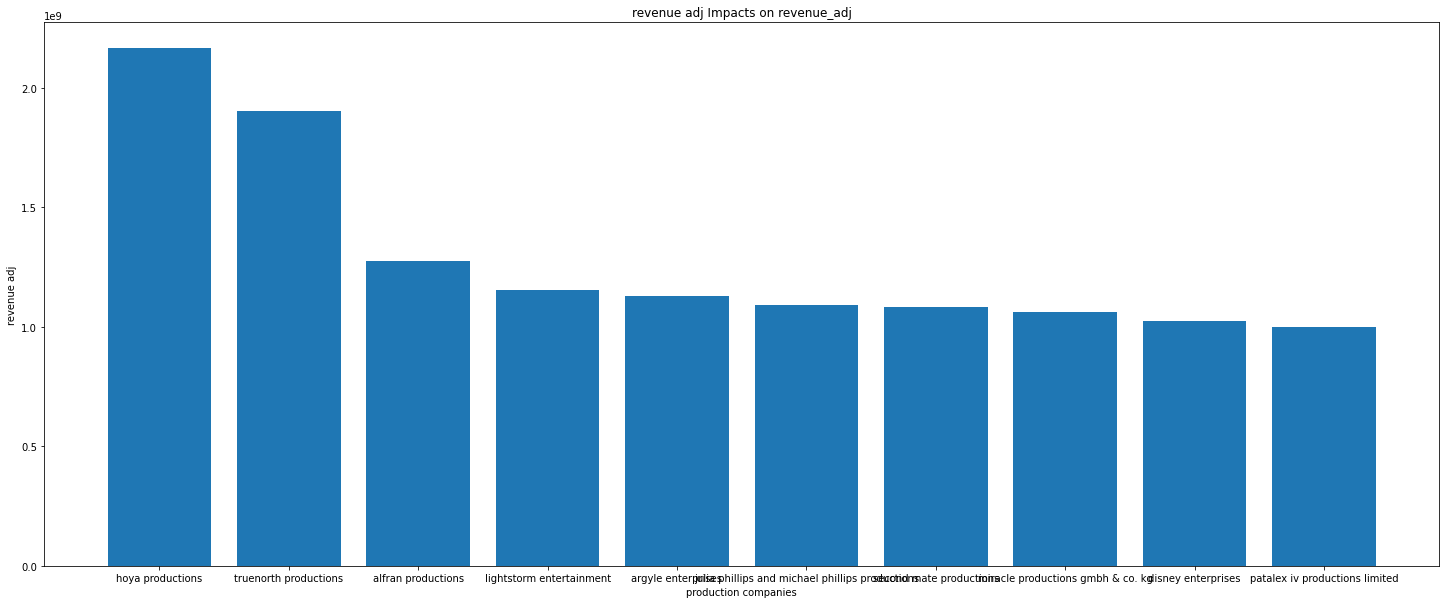

,production_companies,revenue_adj
1974,hoya productions,2.167325e+09
3859,truenorth productions,1.902723e+09
543,alfran productions,1.277914e+09
2368,lightstorm entertainment,1.153026e+09
661,argyle enterprises,1.129535e+09
2197,julia phillips and michael phillips productions,1.092965e+09
3363,second mate productions,1.081672e+09
2633,miracle productions gmbh & co. kg,1.062776e+09
1369,disney enterprises,1.024887e+09
2961,patalex iv productions limited,1.000353e+09


In [25]:
production_companies_popularity_df=drow_bar(production_companies_revenue_adj_df,'production_companies','revenue_adj',25,10,0,10)
production_companies_popularity_df

<a id='eda'></a>
### Exploratory Data Analysis for cast

In [26]:
cast_df=split_columns(df,'cast','id')

In [27]:
cast_df.query('cast=="rod steiger"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8712,2636.0,tt0111255,0.605753,45000000,170362582.0,The Specialist,rod steiger,NaN,Luis Llosa,The government taught him to kill. Now he's us...,...,May Munro is a woman obsessed with getting rev...,110,Action|Thriller,Jerry Weintraub Productions|Warner Bros.|Iguan...,10/7/94,162.0,5.5,1994,6.620002e+07,2.506224e+08
16792,11449.0,tt0078767,0.593218,0,86432000.0,The Amityville Horror,rod steiger,NaN,Stuart Rosenberg,"For God's Sake, Get Out!",...,"George Lutz and his wife Kathleen, move into t...",117,Drama|Horror|Thriller,American International Pictures (AIP),7/27/79,81.0,6.2,1979,0.000000e+00,2.596896e+08
23299,10633.0,tt0061811,0.428652,2000000,27379978.0,In the Heat of the Night,rod steiger,NaN,Norman Jewison,They got a murder on their hands. They don't ...,...,An African American detective is asked to inve...,109,Crime|Drama|Mystery|Thriller,"United Artists|Mirisch Corporation, The",8/2/67,83.0,7.0,1967,1.307353e+07,1.789764e+08
23906,907.0,tt0059113,1.282053,14000000,111721910.0,Doctor Zhivago,rod steiger,NaN,David Lean,Turbulent were the times and fiery was the lov...,...,Doctor Zhivago is the filmed adapation of the ...,197,Drama|Romance|War,Metro-Goldwyn-Mayer (MGM),12/22/65,126.0,6.9,1965,9.688789e+07,7.731786e+08
24009,28932.0,tt0077531,0.439210,11,11.0,F.I.S.T.,rod steiger,NaN,Norman Jewison,NaN,...,Johnny Kovak joins the Teamsters trade-union i...,145,Drama|Action,chateau productions,4/26/78,13.0,6.7,1978,3.676971e+01,3.676971e+01


In [28]:
cast_vote_avg_df=factors_result_mean(cast_df,'cast','vote_average')
cast_revenue_df=factors_result_mean(cast_df,'cast','revenue')
cast_revenue_adj_df=factors_result_mean(cast_df,'cast','revenue_adj')
cast_popularity_df=factors_result_mean(cast_df,'cast','popularity')

In [29]:
df_combined=combined_df([cast_vote_avg_df,cast_revenue_df,cast_revenue_adj_df,cast_popularity_df],'cast','inner')
df_combined

,cast,vote_average,revenue,revenue_adj,popularity
0,50 cent,6.4,67775640.2,6.595901e+07,1.729764
1,Andy McAvin,7.2,1000000.0,1.000000e+06,0.332904
2,Greg Cusick,6.1,35456.0,3.545600e+04,0.025935
3,Louis C.K.,7.9,1000000.0,9.693980e+05,0.331313
4,Noam Chomsky,7.8,44695.0,4.111938e+04,0.080754
...,...,...,...,...,...
8463,à¸ªà¸£à¸žà¸‡à¸©à¹œ à¸šà¸²à¸•à¸£à¸µ,6.2,8936663.0,9.050933e+06,0.531905
8464,ãngela molina,6.5,3735567.0,5.720643e+06,0.422399
8465,ã“lafur darri ã“lafsson,5.6,140396650.0,1.291649e+08,3.080505
8466,ã‰lisabeth bourgine,7.1,1666511.0,2.589799e+06,0.138521


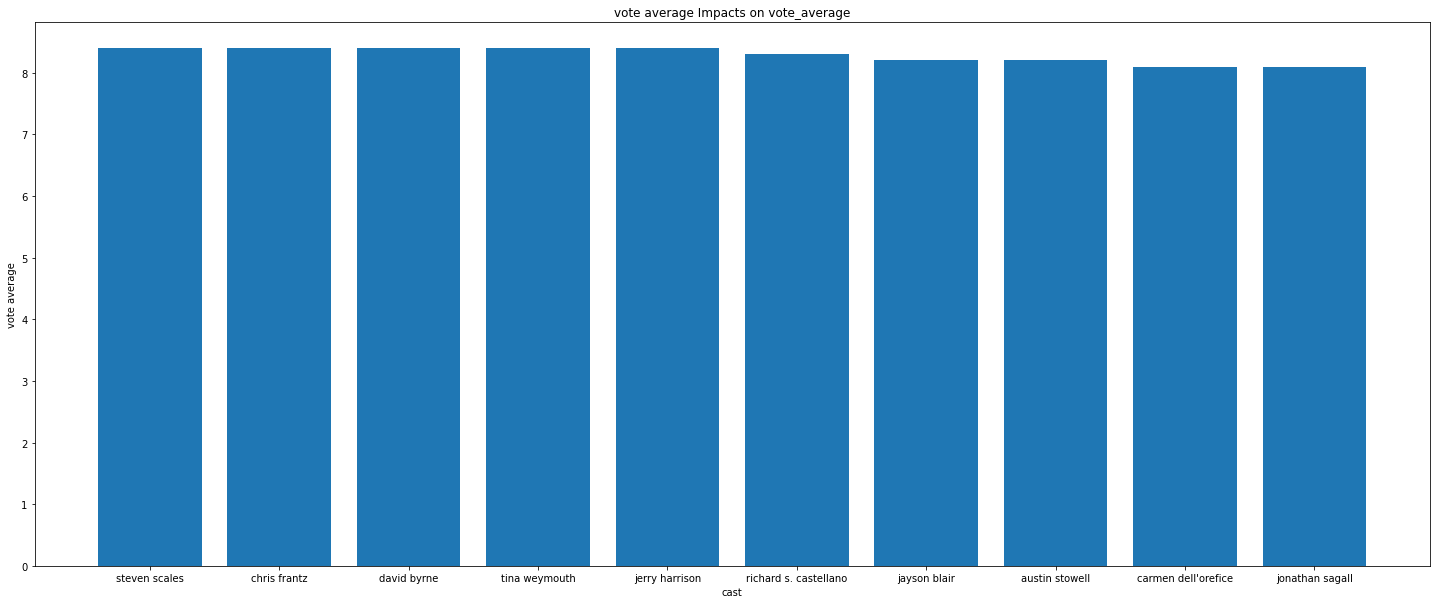

,cast,vote_average
7654,steven scales,8.4
1424,chris frantz,8.4
1902,david byrne,8.4
7955,tina weymouth,8.4
3772,jerry harrison,8.4
6765,richard s. castellano,8.3
3623,jayson blair,8.2
696,austin stowell,8.2
1215,carmen dell'orefice,8.1
4170,jonathan sagall,8.1


In [30]:
cast_vote_avg_df=drow_bar(cast_vote_avg_df,'cast','vote_average',25,10,0,10)
cast_vote_avg_df

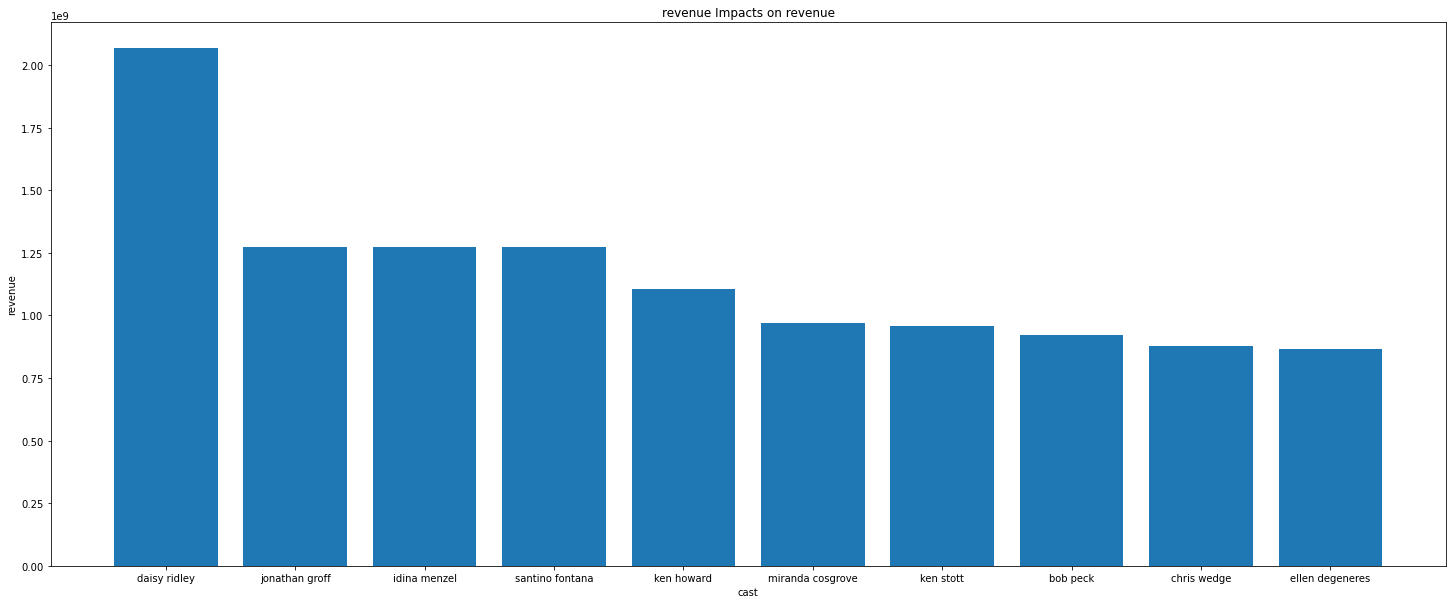

,cast,revenue
1726,daisy ridley,2.068178e+09
4156,jonathan groff,1.274219e+09
3226,idina menzel,1.274219e+09
7196,santino fontana,1.274219e+09
4566,ken howard,1.106280e+09
5836,miranda cosgrove,9.707619e+08
4582,ken stott,9.567599e+08
961,bob peck,9.201000e+08
1458,chris wedge,8.772448e+08
2399,ellen degeneres,8.646260e+08


In [31]:
cast_revenue_df=drow_bar(cast_revenue_df,'cast','revenue',25,10,0,10)
cast_revenue_df

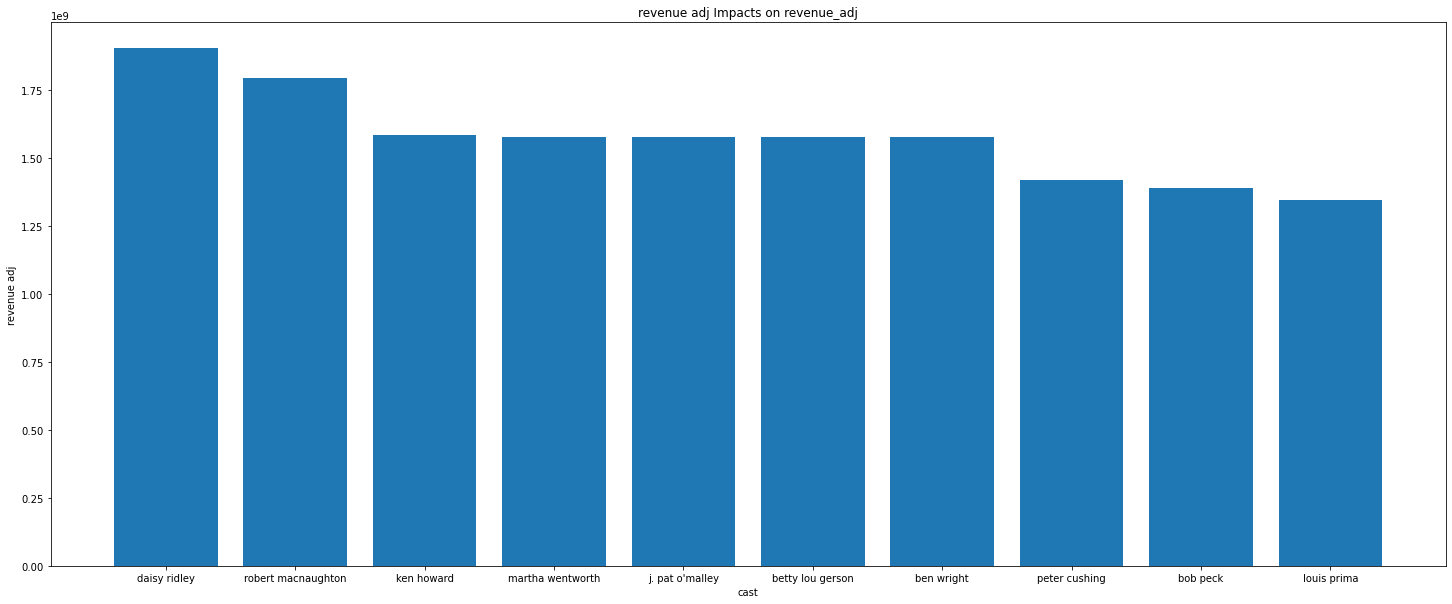

,cast,revenue
1726,daisy ridley,2.068178e+09
4156,jonathan groff,1.274219e+09
3226,idina menzel,1.274219e+09
7196,santino fontana,1.274219e+09
4566,ken howard,1.106280e+09
5836,miranda cosgrove,9.707619e+08
4582,ken stott,9.567599e+08
961,bob peck,9.201000e+08
1458,chris wedge,8.772448e+08
2399,ellen degeneres,8.646260e+08


In [32]:
cast_revenue_adj_df=drow_bar(cast_revenue_adj_df,'cast','revenue_adj',25,10,0,10)
cast_revenue_df

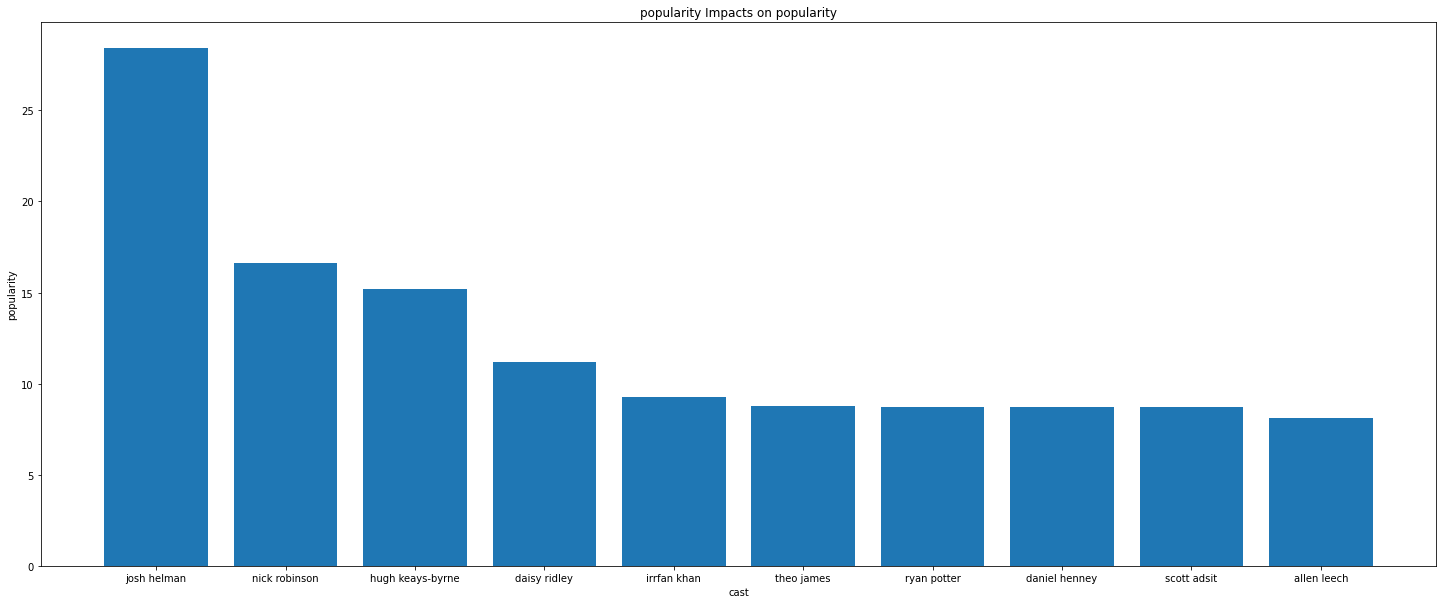

,cast,popularity
4229,josh helman,28.419936
6049,nick robinson,16.602683
3184,hugh keays-byrne,15.215979
1726,daisy ridley,11.173104
3268,irrfan khan,9.255885
7873,theo james,8.762993
7101,ryan potter,8.691294
1790,daniel henney,8.691294
7263,scott adsit,8.691294
307,allen leech,8.110711


In [33]:
cast_popularity_df=drow_bar(cast_popularity_df,'cast','popularity',25,10,0,10)
cast_popularity_df

<a id='eda'></a>
### Exploratory Data Analysis for director

In [34]:
director_df=split_columns(df,'director','id')

In [35]:
director_vote_avg_df=factors_result_mean(director_df,'director','vote_average')
director_revenue_df=factors_result_mean(director_df,'director','revenue')
director_revenue_adj_df=factors_result_mean(director_df,'director','revenue_adj')
director_popularity_df=factors_result_mean(cast_df,'director','popularity')

In [36]:
df_combined=combined_df([director_vote_avg_df,director_revenue_df,director_revenue_adj_df,director_popularity_df],'director','inner')
df_combined

,director,vote_average,revenue,revenue_adj,popularity
0,FrÃ©dÃ©ric Jardin,5.900000,3.358000e+03,3.255239e+03,0.434506
1,A.R. Murugadoss,6.900000,7.600000e+07,7.697178e+07,0.215030
2,Aaron Norris,4.975000,5.660064e+06,9.335159e+06,0.161978
3,Abbas Tyrewala,6.400000,1.110000e+07,1.124193e+07,0.193779
4,Abe Sylvia,6.200000,5.512500e+04,5.512500e+04,0.315527
...,...,...,...,...,...
1890,Zack Snyder,6.566667,2.671562e+08,2.664120e+08,2.199367
1891,Zal Batmanglij,6.300000,2.401510e+06,2.247893e+06,0.337710
1892,Zalman King,4.600000,1.547397e+06,2.853231e+06,0.259260
1893,Ãlex de la Iglesia,6.200000,3.218666e+06,3.218666e+06,0.181532


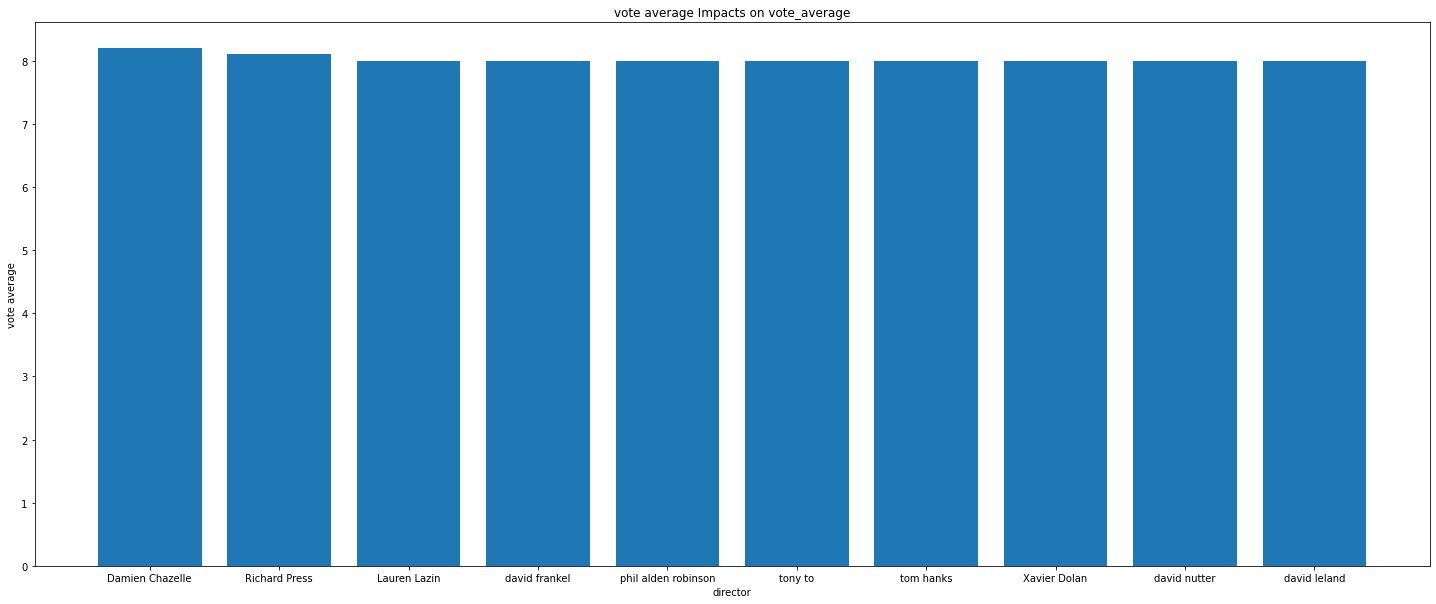

,director,vote_average
329,Damien Chazelle,8.2
1469,Richard Press,8.1
1045,Lauren Lazin,8.0
2005,david frankel,8.0
2277,phil alden robinson,8.0
2379,tony to,8.0
2373,tom hanks,8.0
1884,Xavier Dolan,8.0
2012,david nutter,8.0
2008,david leland,8.0


In [37]:
director_vote_avg_df=drow_bar(director_vote_avg_df,'director','vote_average',25,10,0,10)
director_vote_avg_df

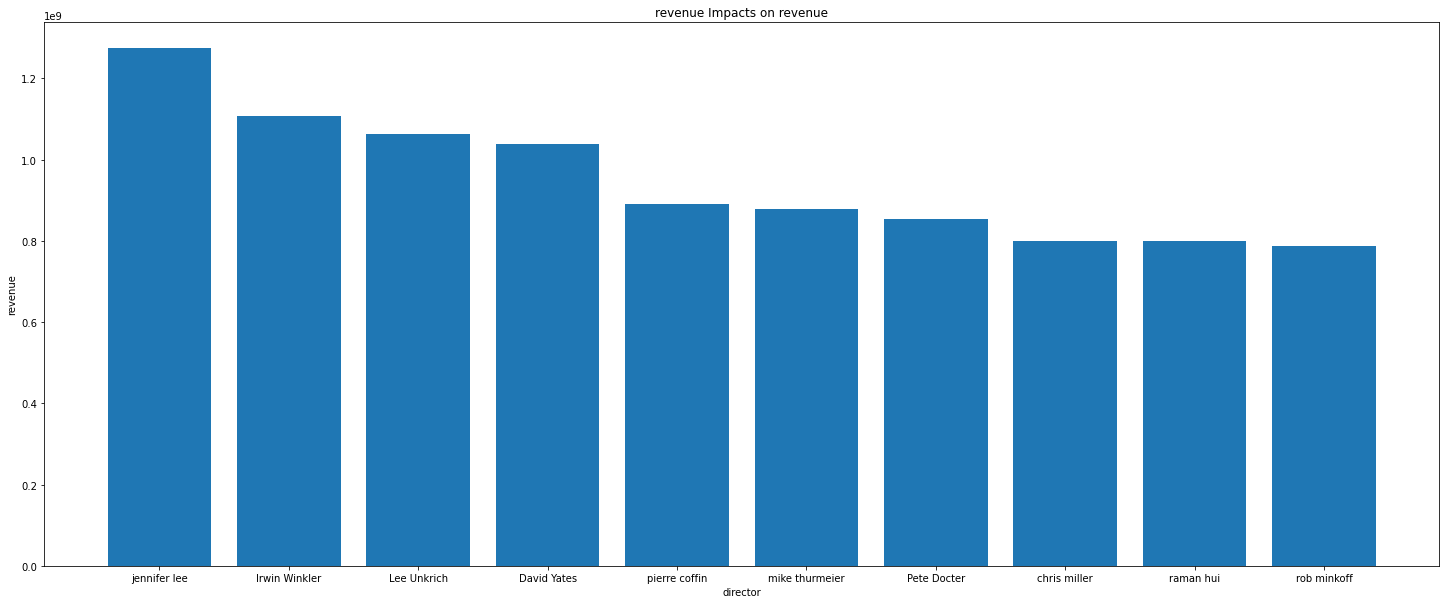

,director,revenue
2128,jennifer lee,1.274219e+09
687,Irwin Winkler,1.106280e+09
1056,Lee Unkrich,1.063172e+09
428,David Yates,1.038574e+09
2280,pierre coffin,8.903356e+08
2241,mike thurmeier,8.772448e+08
1366,Pete Docter,8.537086e+08
1974,chris miller,7.989582e+08
2286,raman hui,7.989582e+08
2300,rob minkoff,7.882418e+08


In [38]:
director_revenue_df=drow_bar(director_revenue_df,'director','revenue',25,10,0,10)
director_revenue_df

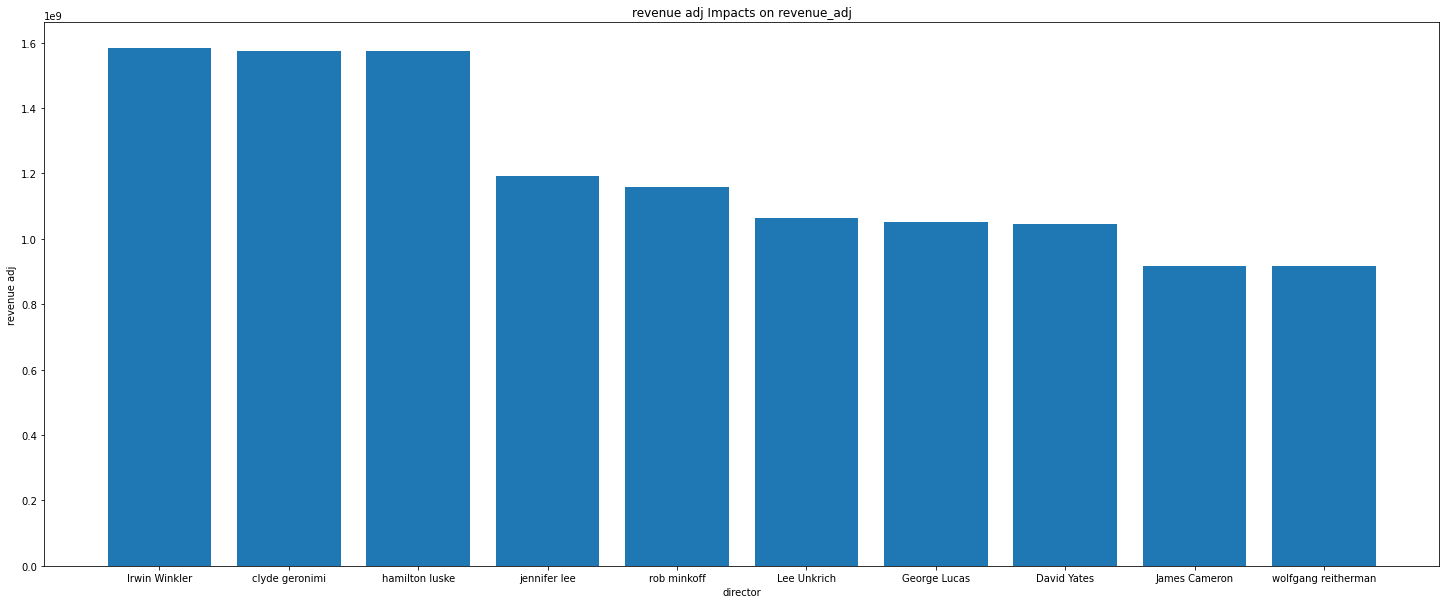

,director,revenue_adj
687,Irwin Winkler,1.583050e+09
1985,clyde geronimi,1.574815e+09
2086,hamilton luske,1.574815e+09
2128,jennifer lee,1.192711e+09
2300,rob minkoff,1.159592e+09
1056,Lee Unkrich,1.063172e+09
595,George Lucas,1.052320e+09
428,David Yates,1.044364e+09
712,James Cameron,9.159026e+08
2400,wolfgang reitherman,9.155169e+08


In [39]:
director_revenue_adj_df=drow_bar(director_revenue_adj_df,'director','revenue_adj',25,10,0,10)
director_revenue_adj_df

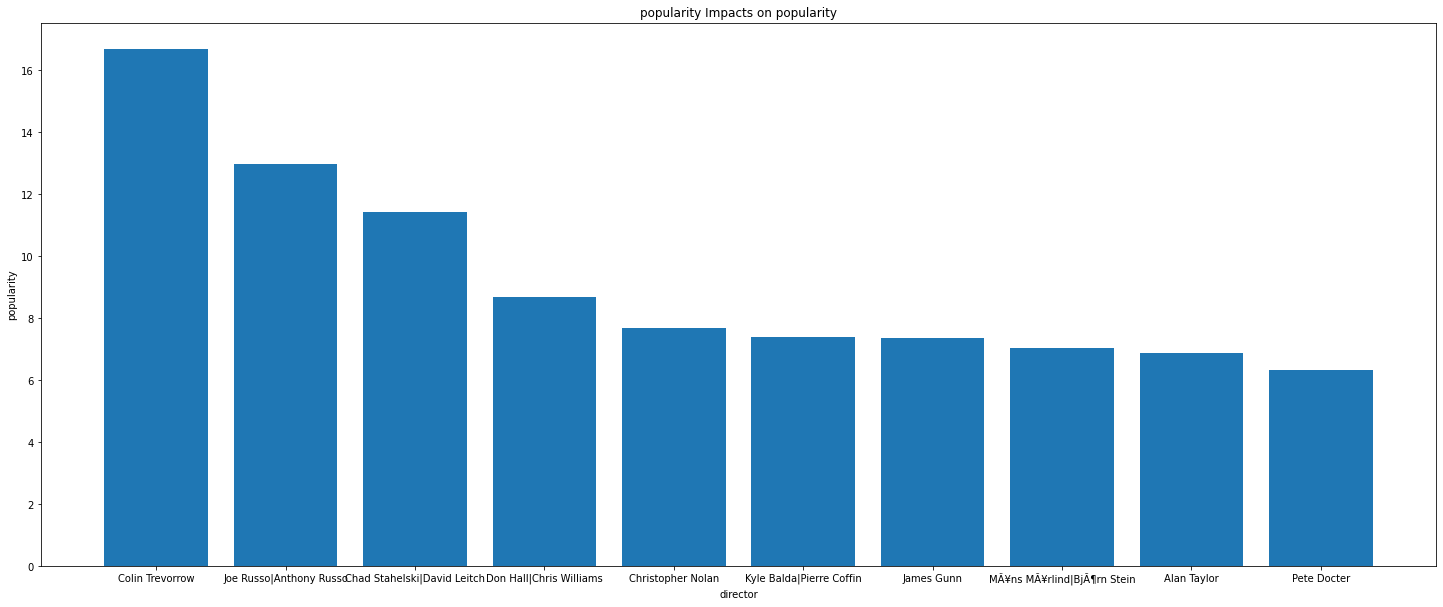

,director,popularity
357,Colin Trevorrow,16.696886
934,Joe Russo|Anthony Russo,12.971027
283,Chad Stahelski|David Leitch,11.422751
529,Don Hall|Chris Williams,8.691294
337,Christopher Nolan,7.695094
1161,Kyle Balda|Pierre Coffin,7.404165
811,James Gunn,7.377549
1421,MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,7.031452
34,Alan Taylor,6.883129
1534,Pete Docter,6.326804


In [40]:
director_popularity_df=drow_bar(director_popularity_df,'director','popularity',25,10,0,10)
director_popularity_df

<a id='eda'></a>
### Exploratory Data Analysis for geners

In [41]:
genres_df=split_columns(df,'genres','id')

In [42]:
genres_df.query('id==97630')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4777,97630.0,tt1790885,1.554441,40000000,132820716.0,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,...,A chronicle of the decade-long hunt for al-Qae...,157,thriller,Columbia Pictures|Annapurna Pictures|First Lig...,12/19/12,1240.0,6.5,2012,3.798977e+07,1.261457e+08
4778,97630.0,tt1790885,1.554441,40000000,132820716.0,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,...,A chronicle of the decade-long hunt for al-Qae...,157,drama,Columbia Pictures|Annapurna Pictures|First Lig...,12/19/12,1240.0,6.5,2012,3.798977e+07,1.261457e+08
4779,97630.0,tt1790885,1.554441,40000000,132820716.0,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,...,A chronicle of the decade-long hunt for al-Qae...,157,history,Columbia Pictures|Annapurna Pictures|First Lig...,12/19/12,1240.0,6.5,2012,3.798977e+07,1.261457e+08


In [43]:
genres_revenue_adj_df=factors_result_mean(genres_df,'genres','revenue_adj')
genres_revenue_df=factors_result_mean(genres_df,'genres','revenue')
genres_vote_avg_df=factors_result_mean(genres_df,'genres','vote_average')
genres_popularity_df=factors_result_mean(genres_df,'genres','popularity')

In [44]:
df_combined=combined_df([genres_revenue_adj_df,genres_revenue_df,genres_vote_avg_df,genres_popularity_df],'genres','inner')
df_combined

,genres,revenue_adj,revenue,vote_average,popularity
0,Action,9.410047e+07,8.966829e+07,5.869231,0.922590
1,Adventure,9.391617e+07,7.342963e+07,5.830769,0.810115
2,Animation,9.637845e+07,7.405009e+07,6.566667,1.039486
3,Comedy,8.256463e+07,6.752123e+07,5.899668,0.873729
4,Documentary,9.686456e+06,8.858677e+06,6.824561,0.263960
5,Drama,6.314976e+07,4.564209e+07,6.513897,0.750973
6,Family,1.163278e+07,1.200000e+07,5.000000,0.767071
7,Fantasy,1.648046e+08,1.154949e+08,6.425000,0.899035
8,History,3.870191e+08,2.893178e+08,6.700000,1.059234
9,Horror,5.753070e+07,4.336590e+07,5.586364,0.709067


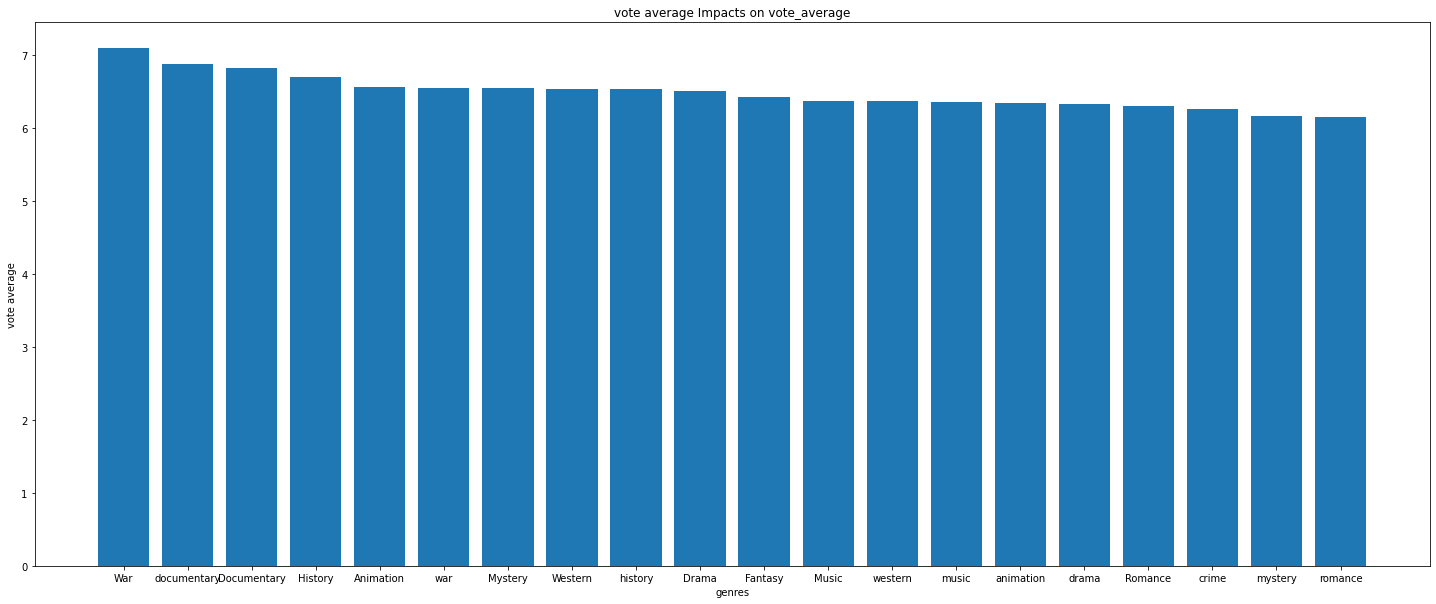

,genres,vote_average
15,War,7.100000
22,documentary,6.882222
4,Documentary,6.824561
8,History,6.700000
2,Animation,6.566667
35,war,6.553333
11,Mystery,6.550000
16,Western,6.544444
27,history,6.533553
5,Drama,6.513897


In [45]:
genres_vote_avg_df=drow_bar(genres_vote_avg_df,'genres','vote_average',25,10,0,20)
genres_vote_avg_df

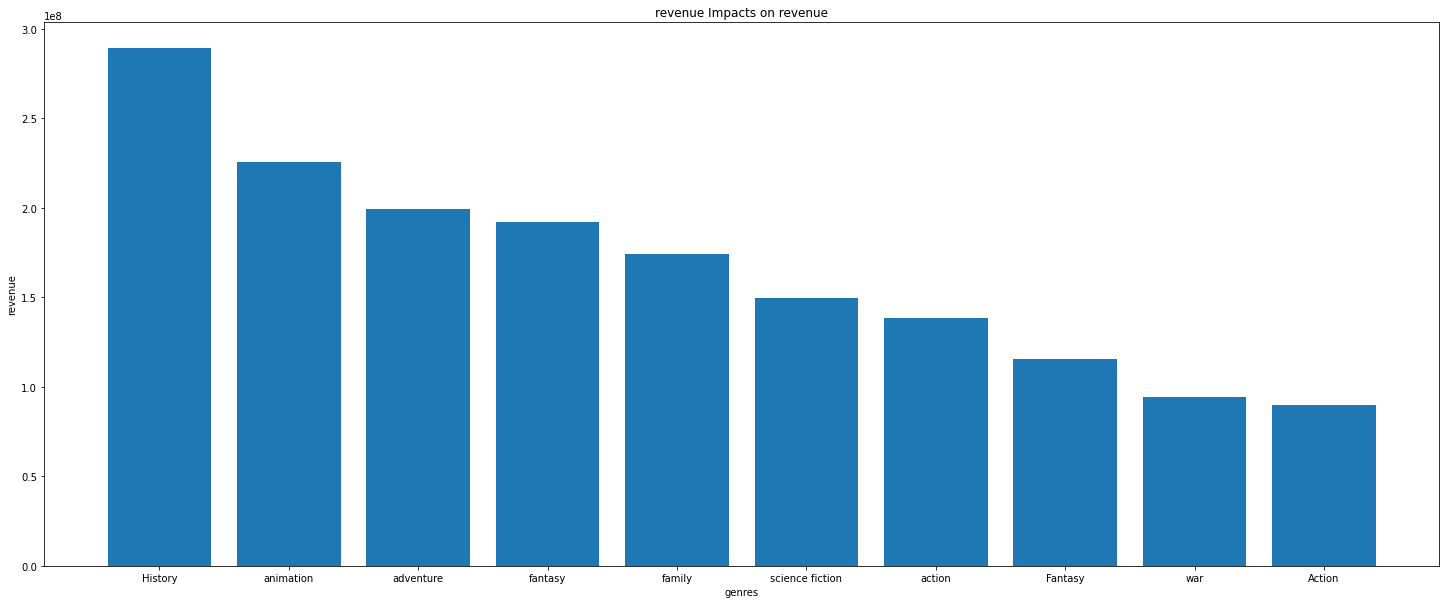

,genres,revenue
8,History,2.893178e+08
19,animation,2.257995e+08
18,adventure,1.993629e+08
25,fantasy,1.920379e+08
24,family,1.741274e+08
32,science fiction,1.495788e+08
17,action,1.387449e+08
7,Fantasy,1.154949e+08
35,war,9.429330e+07
0,Action,8.966829e+07


In [46]:
genres_revenue_df=drow_bar(genres_revenue_df,'genres','revenue',25,10,0,10)
genres_revenue_df

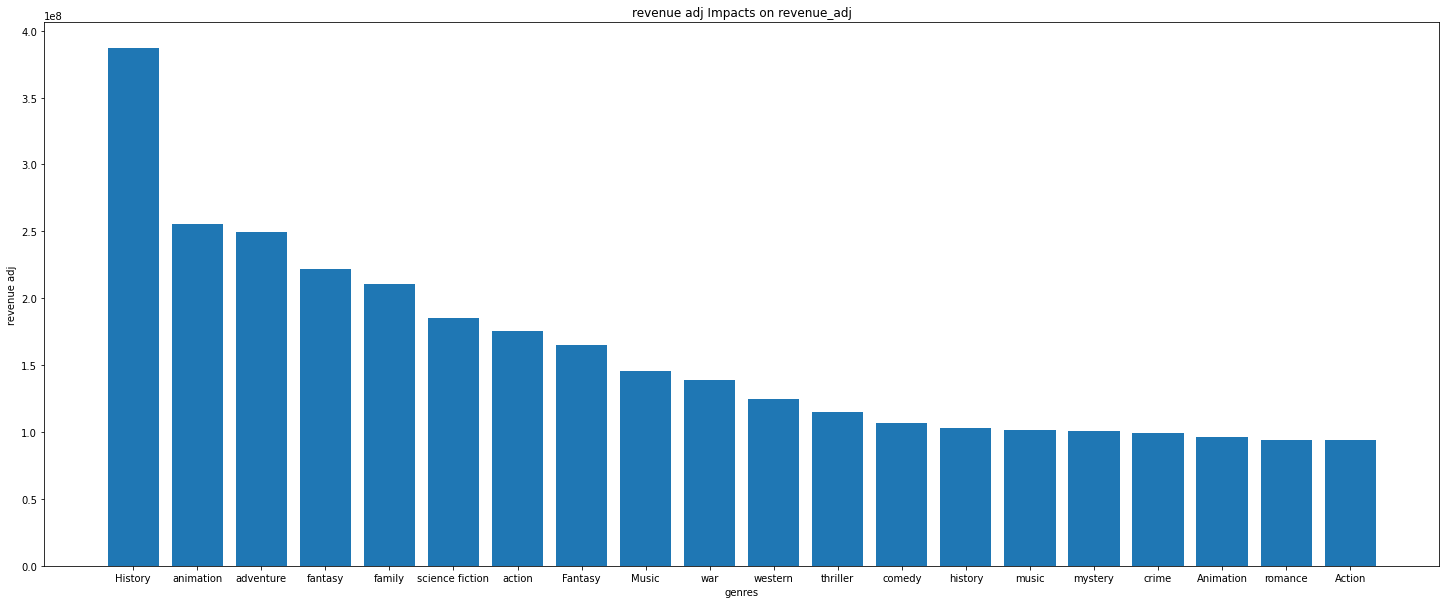

,genres,revenue_adj
8,History,3.870191e+08
19,animation,2.554795e+08
18,adventure,2.496185e+08
25,fantasy,2.215126e+08
24,family,2.109224e+08
32,science fiction,1.853446e+08
17,action,1.752878e+08
7,Fantasy,1.648046e+08
10,Music,1.454100e+08
35,war,1.387380e+08


In [47]:
genres_revenue_adj_df=drow_bar(genres_revenue_adj_df,'genres','revenue_adj',25,10,0,20)
genres_revenue_adj_df

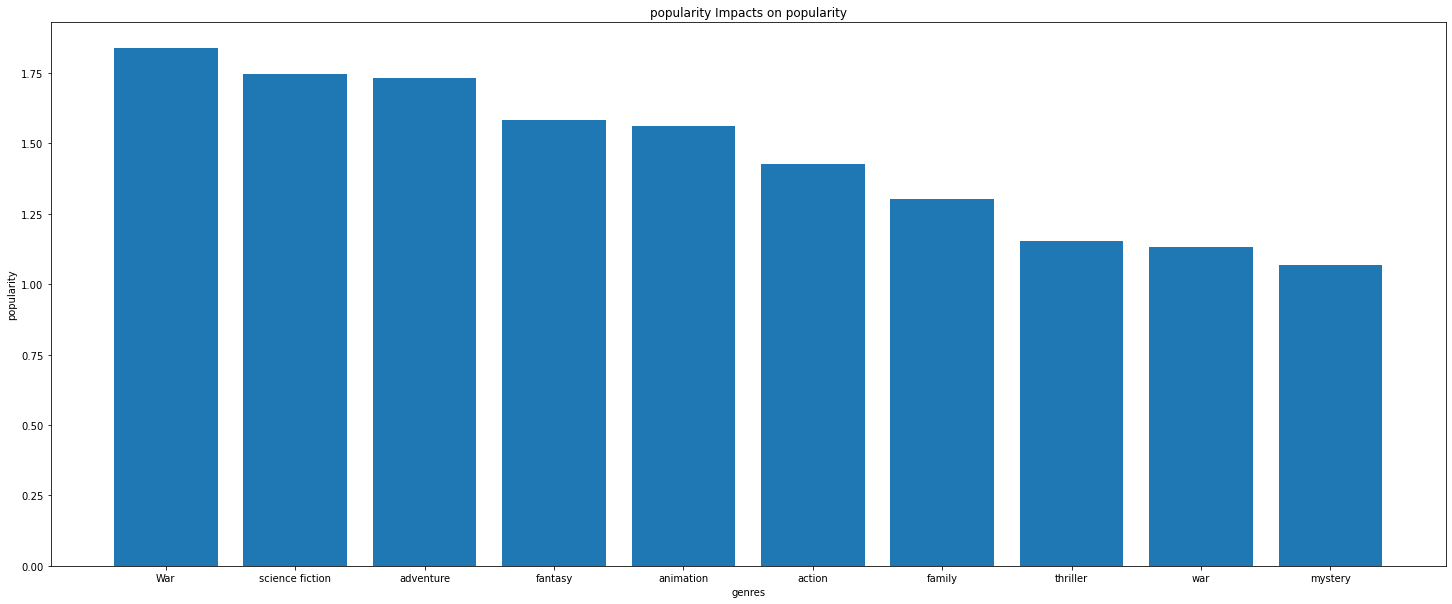

,genres,popularity
15,War,1.837708
32,science fiction,1.747303
18,adventure,1.730786
25,fantasy,1.581204
19,animation,1.559371
17,action,1.426054
24,family,1.300297
33,thriller,1.151212
35,war,1.132143
30,mystery,1.067043


In [48]:
genres_popularity_df=drow_bar(genres_popularity_df,'genres','popularity',25,10,0,10)
genres_popularity_df

In [49]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12664 entries, 0 to 12663
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12664 non-null  float64
 1   imdb_id               12664 non-null  object 
 2   popularity            12664 non-null  float64
 3   budget                12664 non-null  object 
 4   revenue               12664 non-null  float64
 5   original_title        12664 non-null  object 
 6   cast                  12654 non-null  object 
 7   homepage              4319 non-null   object 
 8   director              12660 non-null  object 
 9   tagline               11583 non-null  object 
 10  keywords              12088 non-null  object 
 11  overview              12664 non-null  object 
 12  runtime               12664 non-null  object 
 13  genres                12664 non-null  object 
 14  production_companies  12445 non-null  object 
 15  release_date       

In [50]:
splited_genres = set('|'.join(df.genres.value_counts().index).strip().lower().split('|'))

<a id='eda'></a>
### Exploratory Data Analysis for cast per geners

In [51]:
genres_cast_df=split_columns(genres_df,'cast','id')

In [52]:
genres_cast_vote_avg_df=factors_result_mean(genres_cast_df,['genres','cast'],'vote_average')
genres_cast_revenue_df=factors_result_mean(genres_cast_df,['genres','cast'],'revenue')
genres_cast_revenue_adj_df=factors_result_mean(genres_cast_df,['genres','cast'],'revenue_adj')
genres_cast_popularity_df=factors_result_mean(genres_cast_df,['genres','cast'],'popularity')

In [53]:
df_combined=combined_df([genres_cast_vote_avg_df,genres_cast_revenue_df,genres_cast_revenue_adj_df,genres_cast_popularity_df],['genres','cast'],'inner')
df_combined

,genres,cast,vote_average,revenue,revenue_adj,popularity
0,Action,adam scott,4.80,46546197.0,5.373504e+07,0.344278
1,Action,adetokumboh m'cormack,6.20,1236094.0,1.137206e+06,0.514735
2,Action,andrew cheney,6.20,1236094.0,1.137206e+06,0.514735
3,Action,angie harmon,4.90,58795814.0,6.969377e+07,0.275184
4,Action,antonio banderas,6.10,98185582.0,1.163845e+08,1.318505
...,...,...,...,...,...,...
36738,western,willie nelson,4.80,61801971.0,1.856874e+08,0.151386
36739,western,xander berkeley,5.95,29064306.0,3.669347e+07,0.616762
36740,western,yul brynner,7.00,4905000.0,3.616441e+07,1.872132
36741,western,zoe kazan,6.30,876302.0,8.763020e+05,0.170821


In [54]:
top_ten_cast_gener_df=genres_cast_revenue_adj_df.query('genres=="2"')
for i in splited_genres:
    temp_df=genres_cast_revenue_adj_df.query('genres.str.lower().str.strip()=="{}" '.format(i))
    temp_df=temp_df.sort_values(by='revenue_adj',ascending=False)
    temp_df=temp_df.iloc[0:10]
    top_ten_cast_gener_df=top_ten_cast_gener_df.append(temp_df)


<a id='eda'></a>
### Exploratory Data Analysis for director per geners

In [55]:
genres_director_df=split_columns(genres_df,'director','id')

In [56]:
genres_director_vote_avg_df=factors_result_mean(genres_director_df,['genres','director'],'vote_average')
genres_director_revenue_df=factors_result_mean(genres_director_df,['genres','director'],'revenue')
genres_director_revenue_adj_df=factors_result_mean(genres_director_df,['genres','director'],'revenue_adj')
genres_director_popularity_df=factors_result_mean(genres_director_df,['genres','director'],'popularity')

In [57]:
df_combined=combined_df([genres_director_vote_avg_df,genres_director_revenue_df,genres_director_revenue_adj_df,genres_director_popularity_df],['genres','director'],'inner')
df_combined

,genres,director,vote_average,revenue,revenue_adj,popularity
0,Action,AgustÃ­n DÃ­az Yanes,5.7,23321954.0,2.522664e+07,0.500077
1,Action,Andrew Davis,7.0,55011732.0,5.950449e+07,0.632875
2,Action,Andy Tennant,5.5,136000000.0,1.360000e+08,1.255298
3,Action,Chad Burns,6.2,1236094.0,1.137206e+06,0.514735
4,Action,Christopher McQuarrie,7.1,682330139.0,6.277435e+08,4.566713
...,...,...,...,...,...,...
9042,western,john sanford,5.8,103951461.0,1.200063e+08,0.837906
9043,western,kelly asbury,7.1,122563539.0,1.485790e+08,1.040588
9044,western,lorna cook,7.1,122563539.0,1.485790e+08,1.040588
9045,western,richard thorpe,6.1,50000000.0,3.604224e+08,0.526108


In [58]:
top_ten_director_gener_df=genres_director_revenue_adj_df.query('genres=="2"')
for i in splited_genres:
    temp_df=genres_director_revenue_adj_df.query('genres.str.lower().str.strip()=="{}" '.format(i))
    temp_df=temp_df.sort_values(by='revenue_adj',ascending=False)
    temp_df=temp_df.iloc[0:10]
    top_ten_director_gener_df=top_ten_director_gener_df.append(temp_df)

In [59]:
top_ten_director_gener_df.head(100)

,genres,director,revenue_adj
6587,music,Robert Wise,1.129535e+09
6526,music,John Badham,8.530813e+08
6586,music,Robert Stevenson,7.190046e+08
6561,music,Mick Jackson,6.387144e+08
6507,music,Frank Pierson,6.169034e+08
...,...,...,...
6143,horror,Francis Lawrence,4.364399e+08
6307,horror,Ridley Scott,3.741891e+08
6350,horror,Stephen Sommers,3.598210e+08
6142,horror,Francis Ford Coppola,3.354559e+08


In [60]:
df_many_geners=df
geners = ['many geners' if len(str(x).strip().split('|')) > 1 else str(x).strip().lower()  for x in df.genres.values]
df_many_geners.genres=pd.Series(geners)
types=['float']*7
types.append('datetime')
df_many_geners=change_columns_types(df_many_geners,['popularity','vote_average','revenue','revenue_adj','budget_adj','revenue_adj'],types)

In [61]:
many_geners_revenue_adj_df=factors_result_mean(df_many_geners,'genres','revenue_adj')
many_geners_revenue_df=factors_result_mean(df_many_geners,'genres','revenue')
many_geners_vote_avg_df=factors_result_mean(df_many_geners,'genres','vote_average')
many_geners_popularity_df=factors_result_mean(df_many_geners,'genres','popularity')

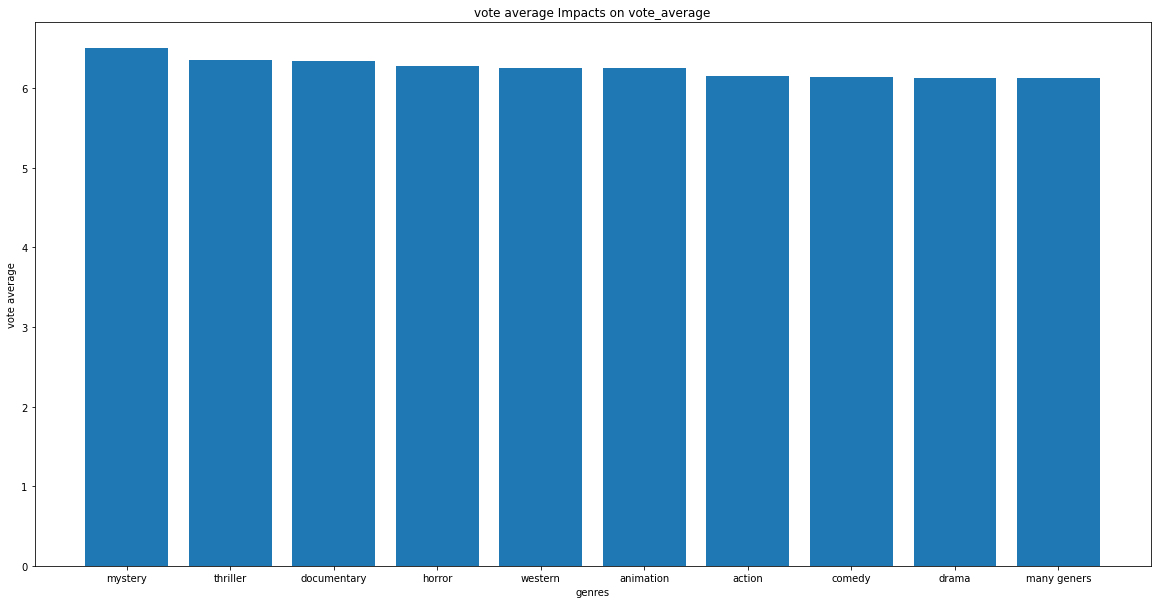

,genres,vote_average
12,mystery,6.500000
15,thriller,6.346154
4,documentary,6.337037
9,horror,6.272000
17,western,6.250000
2,animation,6.250000
0,action,6.150000
3,comedy,6.143089
5,drama,6.125828
10,many geners,6.120601


In [62]:
many_geners_vote_avg_df=drow_bar(many_geners_vote_avg_df,'genres','vote_average',20,10,0,10)
many_geners_vote_avg_df

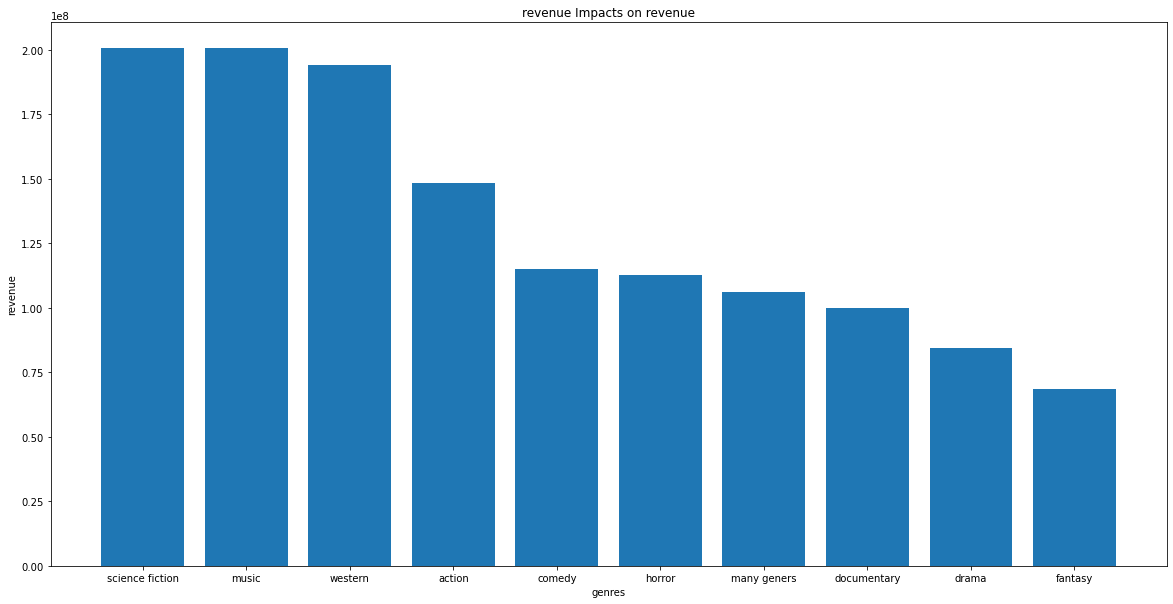

,genres,revenue
14,science fiction,2.006955e+08
11,music,2.006020e+08
17,western,1.942199e+08
0,action,1.484662e+08
3,comedy,1.148863e+08
9,horror,1.126528e+08
10,many geners,1.061967e+08
4,documentary,1.000182e+08
5,drama,8.452512e+07
7,fantasy,6.834988e+07


In [63]:
many_geners_revenue_df=drow_bar(many_geners_revenue_df,'genres','revenue',20,10,0,10)
many_geners_revenue_df

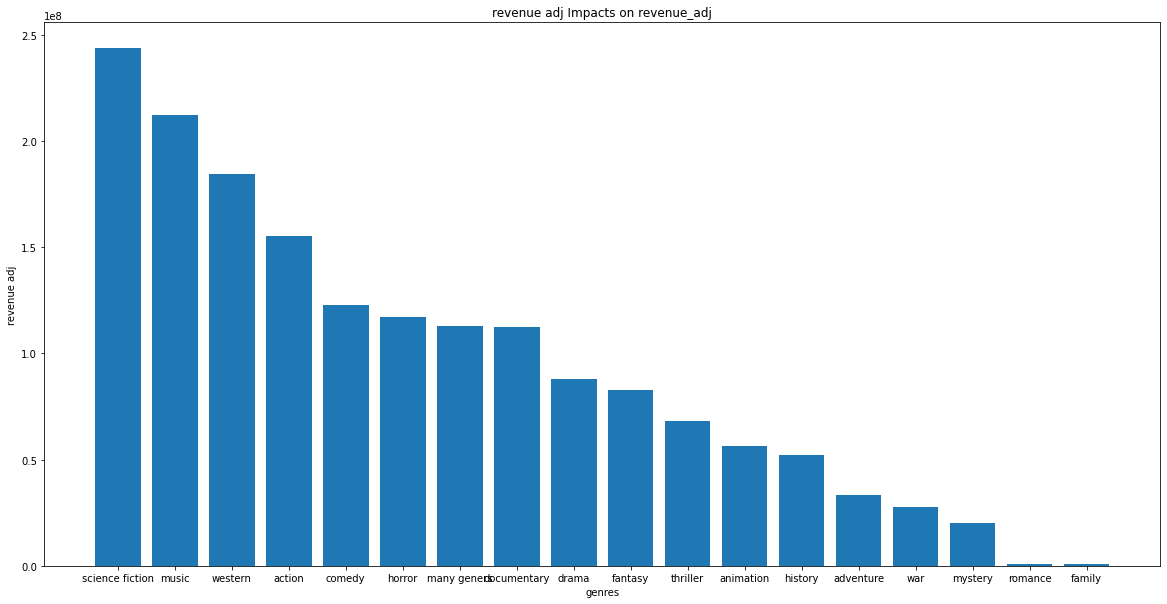

,genres,revenue_adj
14,science fiction,2.436439e+08
11,music,2.121961e+08
17,western,1.844913e+08
0,action,1.553001e+08
3,comedy,1.228055e+08
9,horror,1.170066e+08
10,many geners,1.129467e+08
4,documentary,1.124063e+08
5,drama,8.782601e+07
7,fantasy,8.285793e+07


In [64]:
many_geners_revenue_adj_df=drow_bar(many_geners_revenue_adj_df,'genres','revenue_adj',20,10,0,20)
many_geners_revenue_adj_df

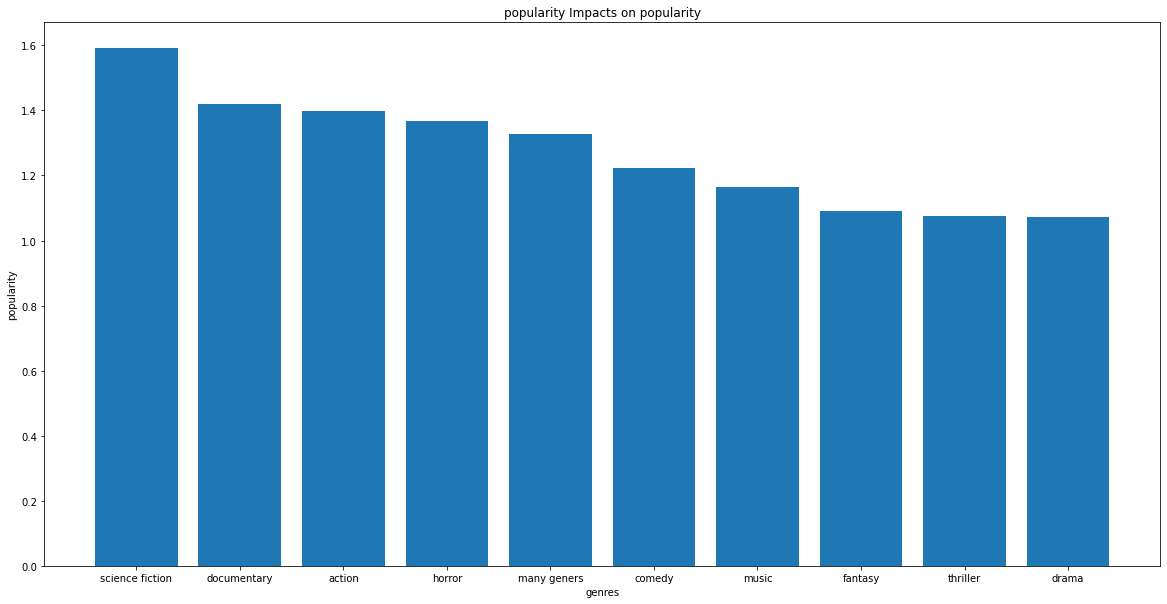

,genres,popularity
14,science fiction,1.591658
4,documentary,1.420590
0,action,1.398542
9,horror,1.368888
10,many geners,1.326424
3,comedy,1.222038
11,music,1.166067
7,fantasy,1.090465
15,thriller,1.074087
5,drama,1.073090


In [65]:
many_geners_popularity_df=drow_bar(many_geners_popularity_df,'genres','popularity',20,10,0,10)
many_geners_popularity_df

In [66]:
def drow_scatter(df,x,y,w,h): 
    corr=df[x].corr(df[y])
    print('the correlation between {} and {} is '.format(x,y),corr)
    df=df.sort_values(by=y)
    plt.figure(figsize=(w, h))
    plt.scatter(df[x],df[y])
    plt.title(x.replace('_',' ') +' Impacts on '+y)
    plt.xlabel(x)
    plt.ylabel(y.replace('_',' '))
    plt.show()



the correlation between budget and revenue is  0.7040088591870438


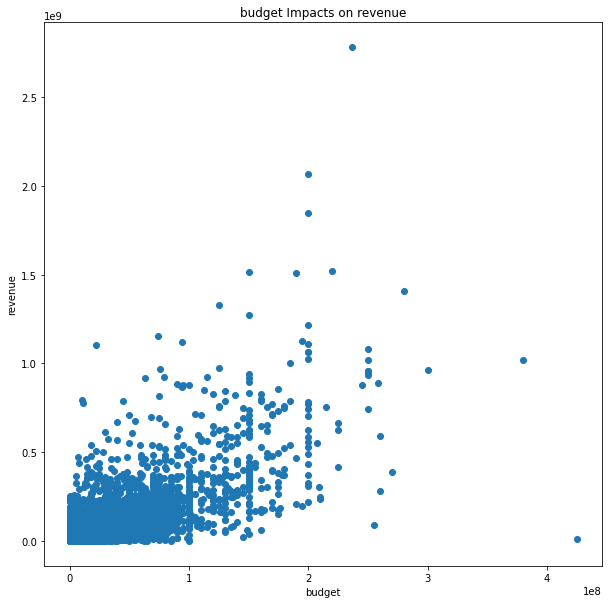

In [67]:
drow_scatter(df,'budget', 'revenue',10,10)

the correlation between vote_average and revenue is  0.20684739207291228


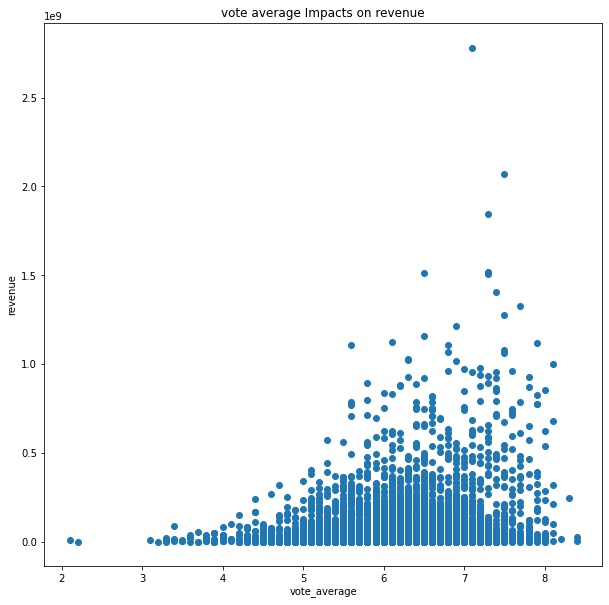

In [68]:
drow_scatter(df,'vote_average', 'revenue',10,10)

the correlation between vote_average and revenue_adj is  0.2423191733134529


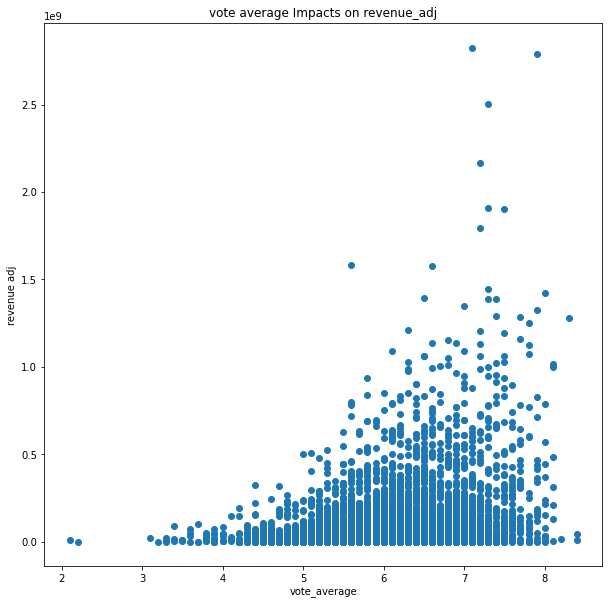

In [69]:
drow_scatter(df,'vote_average', 'revenue_adj',10,10)

the correlation between budget_adj and revenue_adj is  0.5932795800359164


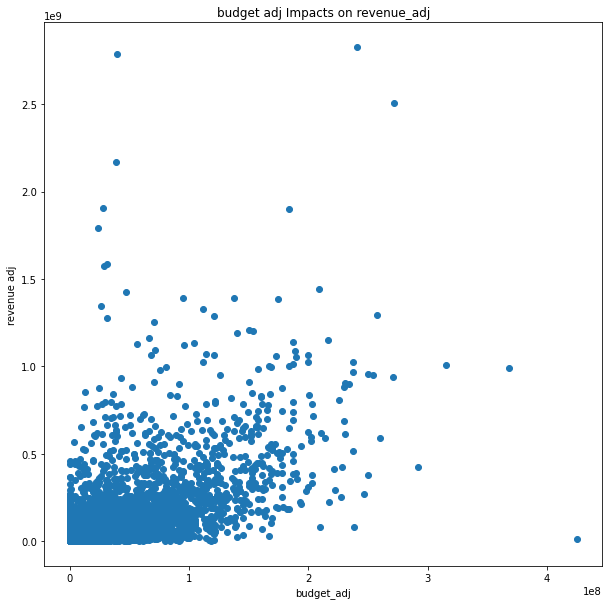

In [70]:
drow_scatter(df,'budget_adj', 'revenue_adj',10,10)

In [71]:
top_ten_cast_gener_df.to_csv('top_ten_cast_per_gener.csv', index=False)

In [72]:
top_ten_director_gener_df.to_csv('top_ten_director_per_gener.csv', index=False)

<a id='conclusions'></a>
## Conclusions

the data set contains 21 columns and 10866 rows there is one duplicate row 
there are 4 measurement (dependent variable) columns revenue_adj, revenue, popularity, and vote_average so those 4 columns' values have not to be zero
after handling measurements columns dataset rows will be 4849 rows 
and there are missing values in many columns when using one of those columns in the analysis as a factor (independent variable) rows that have missing values will be dropped 

the question is:- how many factors or independent variables (genre, cast, director, and production companies) affect 
measurement or dependant variable  (revenue adj, revenue, popularity,vote average)

Firstly we will create a new dataset by splitting every factor column into many rows if it contains many values note the effect on measurement columns 

production companies:- highest vote 10 production companies movies are (arnold stiefel company,talking heads,alfran productions,linson films,atman entertainment,First Thought Films,duperele films,last waltz inc.,super ã‰cran,fantasy films) 
and 
highest revenue adj 10 production companies movies are (hoya productions,truenorth productions,alfran productions,lightstorm entertainment,argyle enterprises,julia phillips and michael phillips productions,second mate productions,miracle productions gmbh & co. kg,disney enterprises,patalex iv productions limited)

cast:- highest vote 10 actor/actress movies are (steven scales,chris frantz,david byrne,tina weymouth,jerry harrison,richard s. castellano,jayson blair,austin stowell,carmen dell'orefice,jonathan sagall) 
and 
highest revenue adj 10 actor/actress are (daisy ridley,jonathan groff,idina menzel,santino fontana,ken howard,miranda cosgrove,ken stott,bob peck,chris wedge,ellen degeneres)


director:- highest vote 10 director movies are (Damien Chazelle,Richard Press,Lauren Lazin,david frankel,phil alden robinson,tony to,tom hanks,Xavier Dolan,david nutter,david leland)
and 
highest revenue adj 10 director are (Irwin Winkler,clyde geronimi,hamilton luske,jennifer lee,rob minkoff,Lee Unkrich,George Lucas,David Yates,James Cameron,wolfgang reitherman)

genres:- highest vote geners movies are (War,documentary,Documentary,History,Animation,war,Mystery,Western,history,Drama,Fantasy,Music,western,music,animation,
drama,Romance,crime,mystery,romance)
and 
highest revenue adj geners are (History,animation,adventure,fantasy,family,science,action,Fantasy,Music,war,western,thriller,comedy,history,music,mystery,crime,Animation,romance,Action)

There are 2 file named top_ten_cast_per_gener and top_ten_director_per_gener those file contains top 10 revenue adj ber 2 facroies first geners and second cast , director respectively

Secondly we will create a new dataset by combine geners factor by replacing row which contain many geners one word "many geners" if it contains many values ordering this dataset by vote is
(mystery,thriller,documentary,horror,western,animation,action,comedy,drama,many geners,family,war,science fiction,history,music,romance,adventure,fantasy)
and ordering this dataset by revenue adj is
(science fiction,music,western,action,comedy,horror,many geners,
documentary,drama,fantasy,thriller,animation,history,adventure,war,mystery,romance,family)

also found there is strong positive relationship correlation between budget and revenue adj and weak  positive relationship correlation between budget and revenue adj
